v2: REMOVED high. low and open. ONLY close/last.

0 = close/last
objective: guess the next closing value in the next day

In [2]:
a = [['5','6','7'],['1','2','3']]
b = a[0:2]
print(b)
print(np.linspace(0,9,num=10))
def normalize(n):
    n = 1/(1+np.exp(-n))


[['5', '6', '7'], ['1', '2', '3']]


NameError: name 'np' is not defined

In [260]:
import torch
from torch import nn
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
import csv
import numpy as np
import tensorflow as tf

with open(r'C:\Users\user\Documents\road to qm\machine learning\pytorch\stock market\NVDA_10.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
data = np.array(data)
#lookback_range = 1000
#data = data[:lookback_range,:]
num_days = data.shape[0]-1

#print(num_days)
print(data)
print(data.shape)
def normalize(n):
    n = 1/(1+np.exp(-n))
    return n
def stock_vector_generator(data, days):
    data = np.delete(data,0,axis = 0) #deletes the top row
    upper_range = np.random.randint(days,num_days) #gives index between days and num_days as a starting point.
    lower_range = upper_range - days
    #closing value the next day - this will be our test data
    next_day_row = data[lower_range-1]
    
   
    #slicing data into small chunks and removing unneccessary rows and columns
    stock_array = data[lower_range:upper_range,:]
    #print(stock_array)
    #print(stock_array.shape)
    #print('Date start: ' + stock_array[-1][0])
    #print('Date end: ' + stock_array[0][0])
    #print('Days: ' + str(days))
    stock_array = stock_array[:,1] #only need closing price
    #now to get rid of the dollar sign and change all into floats
    for i in range(len(stock_array)):
        price = stock_array[i]
        price = price[1:]
        stock_array[i] = price
    stock_array = np.array([list(map(float,stock_array))])
    #stock_array = np.array([list( map(float,i) )]
    #stock_array = np.array([list( map(normalize,i) ) for i in stock_array])
    #now turn into a single lined vector
    stock_vector = stock_array.reshape(days,1)
    return stock_vector, next_day_row

[['Date' 'Close/Last' 'Volume' 'Open' 'High' 'Low']
 ['08/16/2024' '$124.58' '302589900' '$121.94' '$125.00' '$121.18']
 ['08/15/2024' '$122.86' '318086700' '$118.76' '$123.24' '$117.47']
 ...
 ['08/21/2014' '$0.4768' '272795280' '$0.48' '$0.4825' '$0.476']
 ['08/20/2014' '$0.4813' '221469840' '$0.4825' '$0.4848' '$0.4801']
 ['08/19/2014' '$0.4843' '248259960' '$0.4805' '$0.4868' '$0.4788']]
(2517, 6)


In [34]:
#initializing
days = 10
stock_vector, next_day_row = stock_vector_generator(data,days)
stock_tensor = torch.from_numpy(stock_vector)
actual = torch.from_numpy(np.array([float(next_day_row[1][1:])])).float()
print(stock_tensor)
print(actual)

tensor([[109.6330],
        [110.5000],
        [114.8250],
        [113.9010],
        [106.4690],
        [103.7990],
        [ 94.9500],
        [ 95.3860],
        [ 94.7800],
        [ 92.4790]], dtype=torch.float64)
tensor([115.])


At 0 step, loss is 273.9745178222656
At 10 step, loss is 13.336715698242188
At 20 step, loss is 7411.79638671875
At 30 step, loss is 8200.544921875
At 40 step, loss is 31.482187271118164
At 50 step, loss is 25.46080207824707
At 60 step, loss is 58.800941467285156
At 70 step, loss is 12.086122512817383
At 80 step, loss is 31.45974349975586
At 90 step, loss is 1623.9407958984375
At 100 step, loss is 1.9064894914627075
At 110 step, loss is 61.83656311035156
At 120 step, loss is 745.5105590820312
At 130 step, loss is 3.981809377670288
At 140 step, loss is 0.03855111449956894
At 150 step, loss is 0.45330947637557983
At 160 step, loss is 40.155174255371094
At 170 step, loss is 0.06783141195774078
At 180 step, loss is 24.692792892456055
At 190 step, loss is 0.515253484249115
At 200 step, loss is 13.054671287536621
At 210 step, loss is 22.9351749420166
At 220 step, loss is 11.107994079589844
At 230 step, loss is 20.009132385253906
At 240 step, loss is 24.330034255981445
At 250 step, loss is 81

At 2060 step, loss is 1.2124342918395996
At 2070 step, loss is 83.08930206298828
At 2080 step, loss is 0.9471030831336975
At 2090 step, loss is 0.27776965498924255
At 2100 step, loss is 95.4765396118164
At 2110 step, loss is 1.1366162300109863
At 2120 step, loss is 82.64828491210938
At 2130 step, loss is 0.14181339740753174
At 2140 step, loss is 49.06092834472656
At 2150 step, loss is 47.248291015625
At 2160 step, loss is 1.9359550476074219
At 2170 step, loss is 13.17468547821045
At 2180 step, loss is 40.67879104614258
At 2190 step, loss is 15.260912895202637
At 2200 step, loss is 1.1441106796264648
At 2210 step, loss is 0.7954789400100708
At 2220 step, loss is 4.540081977844238
At 2230 step, loss is 10.754438400268555
At 2240 step, loss is 3.483640432357788
At 2250 step, loss is 9.838489532470703
At 2260 step, loss is 0.6908928751945496
At 2270 step, loss is 0.8202729821205139
At 2280 step, loss is 4.662781715393066
At 2290 step, loss is 6.6758317947387695
At 2300 step, loss is 30.637

At 4110 step, loss is 5.563554763793945
At 4120 step, loss is 0.018660085275769234
At 4130 step, loss is 5.840191841125488
At 4140 step, loss is 1.9803590774536133
At 4150 step, loss is 3.89255428314209
At 4160 step, loss is 0.018725410103797913
At 4170 step, loss is 0.369100958108902
At 4180 step, loss is 0.13436010479927063
At 4190 step, loss is 9.53579330444336
At 4200 step, loss is 49.56867599487305
At 4210 step, loss is 2736.19384765625
At 4220 step, loss is 0.5095940828323364
At 4230 step, loss is 14.939196586608887
At 4240 step, loss is 24.3695125579834
At 4250 step, loss is 22.88393211364746
At 4260 step, loss is 19.053447723388672
At 4270 step, loss is 13.219827651977539
At 4280 step, loss is 7.150692939758301
At 4290 step, loss is 21.924375534057617
At 4300 step, loss is 0.635627031326294
At 4310 step, loss is 0.14246633648872375
At 4320 step, loss is 25.531936645507812
At 4330 step, loss is 10.92284107208252
At 4340 step, loss is 0.16361871361732483
At 4350 step, loss is 51.

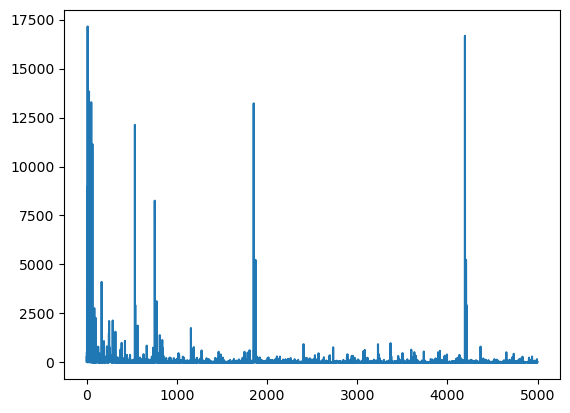

In [263]:
#hyperparameters:
loss_array =[]
days = 1000 #control number of days available to the neural network

batch_size = 100 #in huge datasets it is customary to use batch size and updating parameters each batch until it covers the whole 
#dataset each epoch. It is also customary to use powers of 2 for the batch size.

learning_rate = 0.001

n_epoch = 5000 #an epoch ends when the whole training set is covered.

input_size = days#I hate tensors

dimensions = {"L0": input_size, "L1": 100, "L2": 20, "L3":10, "L4":1} #number of nodes in each layer, L4 is the output. 10 IS FIXED
class NeuralNetwork(nn.Module):
    def __init__(self, dimensions):
        super(NeuralNetwork, self).__init__()
        self.L1 = nn.Linear(dimensions['L0'], dimensions['L1'])
        self.relu = nn.ReLU()
        self.L2 = nn.Linear(dimensions['L1'], dimensions['L2'])
        self.L3 = nn.Linear(dimensions['L2'], dimensions['L3'])
        self.L4 = nn.Linear(dimensions['L3'], dimensions['L4'])
    def forward(self, x): #x is the input
        #3 layers, each with relu except the last layer.
        x = self.L1(x)
        x = self.relu(x)
        x = self.L2(x)
        x = self.relu(x)
        x = self.L3(x)
        x= self.relu(x)
        y_predict = self.L4(x)
        return y_predict
model = NeuralNetwork(dimensions)

lossf = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

for epoch in range(n_epoch):

    stock_vector, next_day_row = stock_vector_generator(data,days)
    stock_tensor = torch.from_numpy(stock_vector).float().T  #transpose because pytorch is shit
    actual = torch.from_numpy(np.array([float(next_day_row[1][1:])])).float()
    
    y_predict = model(stock_tensor) #forward prop
        
    loss = lossf(y_predict, actual)
    loss_array.append(loss)
    loss.backward() #backprop
        
    optimizer.step() #update parameters
    optimizer.zero_grad() #resets the gradients
    if epoch % 10 == 0:
        print(f'At {epoch} step, loss is {loss}')
print(f'At the last step, loss is {loss}')
with torch.no_grad():
    
    plt.plot(np.linspace(0,n_epoch-1,num=n_epoch), loss_array)

Predicted on 03/21/2019 : 
3.5188198
Actual was: 
4.5985
23.478964685006826%
previous price: 4.36
Directions disagree


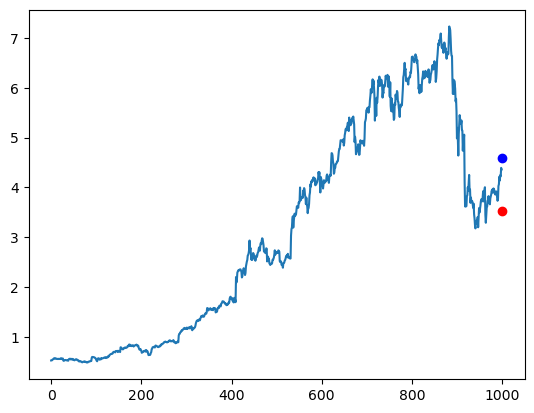

In [274]:
with torch.no_grad():
    stock_vector, next_day_row = stock_vector_generator(data,days)
    stock_tensor = torch.from_numpy(stock_vector).float().T 
    predicted = model(stock_tensor)
    predicted = predicted.numpy()[0][0]
    test_actual = float(next_day_row[1][1:])
    day = next_day_row[0]
    print('Predicted on ' + day + ' : ')
    print(predicted)
    print('Actual was: ')
    print(test_actual)
    diff = 100*((test_actual - predicted)**2)**0.5/test_actual 
    print(str(diff) + '%')
    prev_price = stock_vector[0][0]
    print('previous price: ' + str(prev_price))
    if prev_price > test_actual:
        if prev_price > predicted:
            print('Price will decrease as predicted')
        else:
            print('Directions disagree')
    else:
        if prev_price < predicted:
            print('Price will increase as predicted')
        else:
            print('Directions disagree')
    plt.plot(np.linspace(0,days-1,num=days),  stock_vector[::-1])
    plt.plot(days,predicted, 'ro', label = 'predicted')
    plt.plot(days,test_actual, 'bo')

    